### Preprocessing

In [1]:
# importing the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import sklearn
from scipy.linalg import svd
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
# loadind the data 
d1 = pd.read_csv('mnist_train.csv', header = None)

In [3]:
d1.shape

(6000, 785)

In [4]:
# print the first 5 rows to know that thae dataset has been read
d1.head(5)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# get the lables
l = d1.iloc[:,0]
print(l.shape)

(6000,)


In [6]:
# get the features
d2 = d1.iloc[:,1:]

In [7]:
d2.shape

(6000, 784)

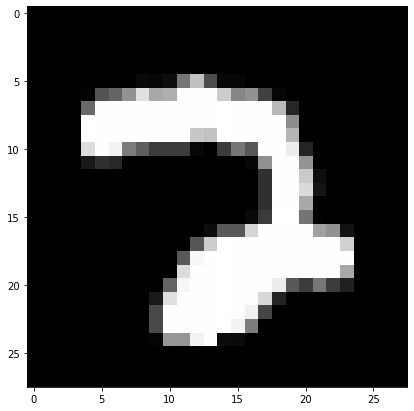

2.0


In [8]:
# printing an image to see that the data set has been loaded
plt.figure(figsize=(7,7))
# set the index value this can be changet
index = 120
# plot the image as 28*28 pixel image
# Reshaping 1d to a 2d arryay
show_image= d2.iloc[index].to_numpy().reshape(28,28)  
# plot the image as a gray mapping and set the parameters
plt.imshow(show_image, interpolation = "none", cmap = "gray")
# print the image
plt.show()
print(l[index])

## Task 1
Write code for learning PCA parameters, i.e., mean vector and project matrix from the training data

#### Step 1 : Standardize the data

In [9]:
# seperating the lables and features
# get the lables 
labels = l
# get the features
data = d2

In [10]:
# get the shape of the data set lables have been seperated.
print("Shape of the Sample Data is = ", data.shape)

Shape of the Sample Data is =  (6000, 784)


In [11]:
# standardize the  data mean is 0 and std is 1
standard_data = StandardScaler().fit_transform(data)
print(standard_data.shape)

(6000, 784)


In [12]:
# get the training and testing data
data_train = pd.read_csv('mnist_train.csv',header=None)
data_test = pd.read_csv('mnist_test.csv',header=None)

In [13]:
# get the features and lables from training and testing data
# training lables
train_y = data_train.iloc[:,0].values
# testing lables
test_y = data_test.iloc[:,0].values
# training features
train_x = data_train.iloc[:,1:].values
# testing features
test_x = data_test.iloc[:,1:].values

#### Step 2 :  Calculate Covariance Matrix

In [14]:
# calculate covariance
# Formula : a(transpose)*a for a matrix a
sample_data = standard_data

# use matmul to do matrix multiplication
cov_mat = np.matmul(sample_data.T , sample_data)

print ( "The shape of co-variance matrix = ", cov_mat.shape)

The shape of co-variance matrix =  (784, 784)


#### Step 3 : Find Eigen values and vectors

In [15]:
# find eigen values and vectors
# use the top 2 igen values (782 and 783)
eig_val, eig_vec = eigh(cov_mat, eigvals=(782,783)) #eigh return values in ascending order.
print("Dimention of eigen vector = ",eig_vec.shape)
# Convert eigen vectors toa 2D shape
eig_vec = eig_vec.T
# print updated shape
print("Updated dimention of eigen vector = ",eig_vec.shape)

Dimention of eigen vector =  (784, 2)
Updated dimention of eigen vector =  (2, 784)


#### Step 4 : Find Projection Matrix

In [16]:
# projection matrix
matrix_new = np.matmul(eig_vec, sample_data.T)
print (" The new Projected Matrix Shape is  ", eig_vec.shape, "X", sample_data.T.shape," = ", matrix_new.shape)

 The new Projected Matrix Shape is   (2, 784) X (784, 6000)  =  (2, 6000)


#### Step 5 : Get the principal Components:

In [17]:
# Add the lables back
matrix_new = np.vstack((matrix_new, l)).T
#get the principal components
new_df = pd.DataFrame(data=matrix_new, columns=("1st Principal Comp", "2nd Principal comp", "Labels"))
# print the first few rows of the projected matrix
print(new_df.head())

   1st Principal Comp  2nd Principal comp  Labels
0           -4.728607           -0.923623     5.0
1           -7.081823            8.668516     0.0
2           10.656058            2.184643     4.0
3           -3.171289           -7.279640     1.0
4            4.236192           -5.069486     9.0


#### Mean and Projection matrix returned.

In [18]:
# Perform PCA to return mean and projection matrix
# define a PCA class and add the fetures and the mean value
def PCA(p,q,val_mean =None,attribute=None,training=True):  
    # calculate the mean 
    if training:
        val_mean =  np.mean(p,axis=0,keepdims=True)
    # standardize by sutracting the mean value    
    p = p -val_mean 
    if training:
        # do dimentionality reduction using SVD decomposition
        u, s, v = svd(p) 
        # transpose the features 
        attribute = np.transpose(v[:q,:])
    # get the reduced components projected matrix ,mean matrix and the updated features
    reduced_pc = np.dot(p, attribute)
    # return the projected matrix and the mean values
    return reduced_pc,attribute,val_mean


#### Plotting the data points in the sample space

C:\Users\npath\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


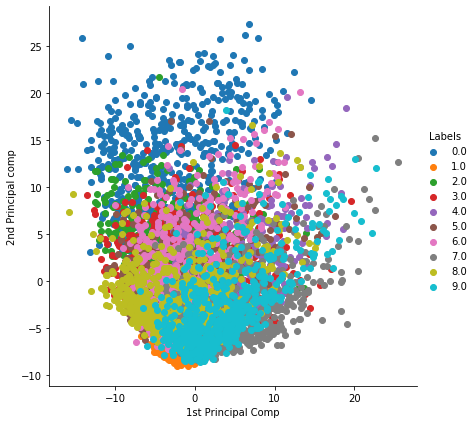

In [19]:
# PLot the points in a 2d space.
import seaborn as sn
# enter parameters and do plotting
sn.FacetGrid(new_df, hue="Labels", size=6,).map(plt.scatter, '1st Principal Comp', '2nd Principal comp').add_legend()
sn.color_palette("Set2")
# plot scatter plot
plt.show()

# Task 2 
Apply PCA to both training and testing set. Then perform classification with the 1-nearest neighbour classifier. Analyse the performance change against different reduced dimensions. (suggestion: from 256 to 10)

In [20]:
# make the KNN classifier
# add training and the testing data and add the number of dimentions 
def KNN(train_x,train_y,test_x,test_y, dimention=256):
    # calculate the mean value and the features and implement the PCA class 
    p_training,attribute,val_mean = PCA(train_x,dimention)
    # get pca components of testing data
    p_testing,_,_ = PCA(test_x,dimention,val_mean,attribute,False)
    # enable KNN classifier with 1 neighbour
    k_near = KNeighborsClassifier(1)
    # fit and imlenent the model
    k_near.fit(p_training, train_y)
    # return the updated score.
    return k_near.score(p_testing,test_y)

In [21]:
update_pc = []
# enter the dimentions for reduction
# iteraltively reduce the number of dimentions
for dimention in [256,200,150,100,50,10]:
    # update the new dimentions
    new_dim = KNN(train_x,train_y,test_x,test_y,dimention=dimention)
    # add them to the empty list
    update_pc.append(new_dim)

#### PLotting of performance measure Accuracy vs Dimentions

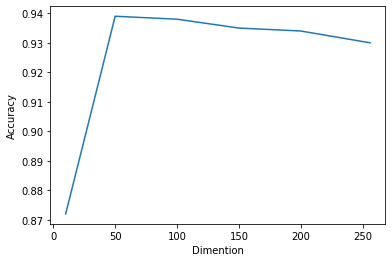

In [22]:
# Analyse performace change against dimention
plt.plot([256,200,150,100,50,10],update_pc)
# set x label
plt.xlabel('Dimention')
# set y label
plt.ylabel('Accuracy')
# plot the performance graph
print()

### Observation : Accuracy 94%
As the dimentions increases the accuracy also increases and reaches a maximum value of about 94% for 50 dimentions and the  decreases gradually as the number of dimentions increases.

# Task 3 :
Write code for implementing k-means clustering. Apply k-means clustering to the MNIST training set without dimensionality reduction. Plot the loss curve, that is, the change of loss value of k-means algorithm with respect to the number of iterations.

#### Get Centroid

In [23]:
# create get centroid function
def Centroid(dataSet,k):
    # get the shape of the data set
    r,s = dataSet.shape
    # initialize the centroid value with a matrix of zeroes
    centroid = np.zeros((k,s))
    # loop theought the number of clusters formed
    
    for j in range(k):
        # update the index value
        idx = int(np.random.uniform(0,r)) 
        # update the centroid.
        centroid[j,:] = dataSet[idx,:]
    # return the centroid value    
    return centroid

#### Get Eucledian Distance

In [24]:
# get the eucledian distance.
def Eucledian(x,y):
    # return distance as the sqrt of the sum of the squared distance 
    return np.sqrt(np.sum((x-y)**2)) 

#### Apply K-means and observe loss by plotting the graph.

In [25]:
# create a Kmeans clustering functin that takes in the data and the dimentions
def K_means_clustering(samp_data,dimention):
    # get shape of the data set
    t = np.shape(samp_data)[0]  
    # get a zero matrix
    clust_eval =np.zeros((t,2))
    # clusters should be updated with each iteration
    clust_cnge = True
 
    # get the centroid
    get_centroid = Centroid(samp_data,dimention)
    # create empty list to store loss values
    get_loss = []
    # iterate throught the clusters 
    while clust_cnge:
        # initilaze the cluster change
        clust_cnge = False 
        # initliaize the loss
        loss = 0
        
        for p in range(t):
            # initilaize the minimum distance
            minimum_distance = 100000.0
            # initialize the index value
            minimum_idx = -1
 
            # calculate the eucledian distance
            for q in range(dimention):
                # get eucledian distance of samples from centroid
                distance = Eucledian(get_centroid[q,:],samp_data[p,:])
                # if not minimum update the distance
                if distance < minimum_distance:
                    # get minimum distance 
                    minimum_distance = distance
                    # update minimum distance
                    minimum_idx = q
                    
            # update the index value
            if clust_eval[p,0] != minimum_idx:
                # update the clusters and store the vlaue in empty list
                clust_cnge = True
                # get the minimum distance and index value
                clust_eval[p,:] = minimum_idx,minimum_distance**2
             # determine the loss   
            loss+=minimum_distance**2
            
        # store the loss    
        get_loss.append(loss/t)
        # get the updated value of centroid
        for q in range(dimention):
            # centroid gets updated with each iteration
            cluster_points = samp_data[np.nonzero(clust_eval[:,0] == q)[0]]  
            # get mean value to update the cluster
            get_centroid[q,:] = np.mean(cluster_points,axis=0)
            
    # return the updated loss ,centroid and new indexes.
    return get_centroid,clust_eval,get_loss


In [26]:
# pass in the training data
get_centroid,clust_eval,get_loss = K_means_clustering(train_x,10)

#### Plotting of performance measures Loss vs Iterations

Text(0, 0.5, 'Loss')

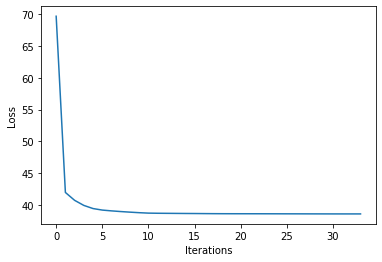

In [27]:
# plot the variation of loss with  the iterations
plt.plot(get_loss)
# set x label
plt.xlabel('Iterations')
# set y Label
plt.ylabel('Loss')

### Observation :
We see that the loss is reduced as the iterations increases indicatng that as samples are being clustered and at the end all the samples have neen correctly sampled.

# Task 4
Randomly choose one training sample from each class as initial clustering centres (so in total 10 centres). Performing k-means to group data into 10 groups with those initialized centres. For each cluster, calculate the percentage of samples sharing the same digit as the initial group centre. Average those percentages as an evaluation metric for k-means clustering. Repeat the above experiment with dimensionality reduced features and calculate the average percentage again. Note that you keep the initial clustering centres fixed through out those experiments. Analyse the performance change against different reduced dimensions. (suggestion: from 256 to 10)


In [28]:
# make the score function to get the updated scores
def get_score(y , new_cluster):
    # return the accuracy metrics
    return sklearn.metrics.accuracy_score(train_y, new_cluster[:,0].reshape(-1))
# make a function to store the index value
def index_val(x,y,w):
    # get the shape of the data set and store it as variable
    m,n = x.shape
    # initialize the centroid
    centroids = np.zeros((w,),dtype = np.int)
    # update the centroid value and store
    for k in range(w):
        # reshape the data set and update the index value
        idx = np.random.choice(np.argwhere(y==k).reshape(-1),size=1)[0]
        # updte the index value of the centroid
        centroids[k] = idx
    # return the updated centroid
    return centroids
# store the cnetroid value
def get_centroids(x,init_ids):
    # return the updated value
    return x[init_ids]


In [29]:
# create the k means function
def new_kmeans(samp_data,w,centroids):
    # store the dimentions of the data set
    t = np.shape(samp_data)[0] 
    # initialze the clusters
    new_cluster =np.zeros((t,2))
    # cluster will update upon successive iterations
    change_cluster = True
 
    # store the updated loss values
    new_loss = []
    # updte the clusters with successive iterations
    while change_cluster:
        
        change_cluster = False
 
        # set minimum distance and indev value
        for p in range(t):
            # set minimum distance 
            minimum_distance = 100000.0
            # set minimum index value
            minimum_index = -1
 
            # Calculate the distance between the sample and the centroid
            for q in range(w):
                # use eucledian distance to calcualte the distance.
                dist = Eucledian(centroids[q,:],samp_data[p,:])
                # if distance is minimum then update it
                if dist < minimum_distance:
                    # update distance 
                    minimum_distance = dist
                    # update index
                    minimum_index = q
            # if not munimum distance find the minimum distance 
            if new_cluster[p,0] != minimum_index:
                # if munimum distance found update the cluster
                change_cluster = True
                # store the values in the new cluster
                new_cluster[p,:] = minimum_index,minimum_distance**2
        # store the updated loss value generated after each iteration        
        new_loss.append(minimum_distance**2)
        # update the centroid value of the new cluster
        for q in range(w):
            new_cluster_points = samp_data[np.nonzero(new_cluster[:,0] == q)[0]] 
            # get the centroid as the mean value of the distance 
            centroids[q,:] = np.mean(new_cluster_points,axis=0)  
    # return the centroid and the new value of cluster and loss.
    return centroids,new_cluster,new_loss


In [30]:
# pass the training data
idx = index_val(train_x,train_y,10)

In [31]:
# set an empty list to score the new mean values
new_score_value = []
# reduce the dimentions and perform PCA
for  dimention in [256,192,96,48,10]:
    # store the dimentions in the variables
    pca_train,feature,mean = PCA(train_x,dimention)
    # get centroid
    centroids = get_centroids(pca_train,idx)
    # update centroid 
    centroids,new_cluster,new_loss = new_kmeans(pca_train,10,centroids)
    # compute the evaluation and performance scores
    new_values = get_score(train_y, new_cluster)
    new_score_value.append(new_values)

#### Plotting of performance measure Accuracy vs Dimentions

Text(0, 0.5, 'Accuracy')

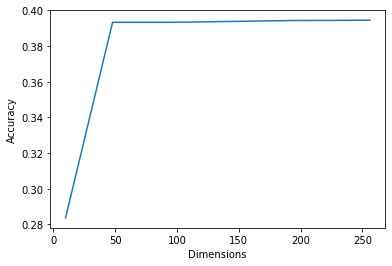

In [32]:
# plot the accuracy as the dimentions are reduced
plt.plot([256,192,96,48,10],new_score_value)
# set x label
plt.xlabel('Dimensions')
# set y label
plt.ylabel('Accuracy')

### Observation :
Hence it is observed that Accuracy firs increases and then attains a stable value that means that all the data points have been classified correctly. Again it is observed that when the number of dimentions is 50 maximum value of accuracy is obtained.